## Cats vs Dogs: Pet Preferences in the UK

## Executive Summary

#### Goal
This project is inspired by a competition from [DataCamp](https://app.datacamp.com/). It looks at the population of cats and dogs in the various regions of the UK, visualizes the data and explores the correlation between different features.

#### Methodology
The data is split in three files which I merge. I identify possible reasons for missing data and replace missing values where relevant. Next, I build visualizations in order to get understanding of the data. Finally, I group the data according to different features and explore the correlation between variables using two methods: 1. Correlation coefficient and p value, and 2. Visualization with a linear regression model fit.

#### Findings
Wales is the region with the largest population of dogs (0.80) and cats (0.70) per household and London is the region with the smallest population of dogs (0.22) and cats (0.20) per household. All of the regions have a higher population of dogs than cats per household. The biggest difference is in Wales where there is almost 0.1 more dogs per household. The smallest difference is in London (~0.02).

There is no significant correlation between 'population' in UK regions and number of dogs and cats per household. However, there is a weak negative correlation between 'population' in towns and number of dogs and cats per household in different UK towns. I illustrate this relationship by calculating the correlation coefficient and p value as well as by visualizing a linear regression model. There is limited data for towns with population of more than 80000 people so the confidence interval is wider. The graphs are very similar for both dogs and cats per household. Overall, we can conclude that a weak negative correlation is present so towns with smaller populations tend to have more dogs and cats per household compared to towns with larger populations.

## Data

There are three data files:

1. The `population_per_postal_code.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `estimated_cat_population` | The estimated cat population for the postal code area |  
| `estimated_dog_population` | The estimated cat population for the postal code area |


2. The `avg_per_household.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `cats_per_household` | The average number of cats per household in the postal code area |  
| `dog_per_household` | The average number of dogs per household in the postal code area |

3. The `postal_code_areas.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `town` | The town/towns which are contained in the postal code area |  
| `county` | The UK county that the postal code area is located in |
| `population` | The population of people in each postal code area |
| `num_households` | The number of households in each postal code area |
| `uk_region` | The region in the UK which the postal code is located in |


***Acknowledgments**: 
Data has been assembled and modified from two different sources: [Animal and Plant Health Agency](https://www.data.gov.uk/search?filters%5Bpublisher%5D=Animal+and+Plant+Health+Agency), [Postcodes](
https://ideal-postcodes.co.uk/guides/postcode-areas) and made available by
[DataCamp](https://app.datacamp.com).

## Exploratory Data Analysis

In [141]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# Load data from the first file
population_raw_data = pd.read_csv('data/population_per_postal_code.csv')
population_raw_data

,postal_code,estimated_cat_population,estimated_dog_population
0,AB10,"1,675.72","1,921.75"
1,AB11,"2,072.99","2,377.35"
2,AB12,"3,601.57","4,130.35"
3,AB13,"1,153.84","1,323.24"
4,AB14,"2,325.13","2,666.50"
...,...,...,...
2825,YO8,"5,115.47","5,866.53"
2826,ZE1,"1,895.51","2,173.81"
2827,ZE2,"4,586.34","5,259.71"
2828,ZE3,105.0080493,120.4254386


In [142]:
# Inspect the data in the first file
population_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   postal_code               2830 non-null   object
 1   estimated_cat_population  2830 non-null   object
 2   estimated_dog_population  2830 non-null   object
dtypes: object(3)
memory usage: 66.5+ KB


In [143]:
# There are no non-null values
# The data types for estimated populations of cats and dogs need to be changed to float
population_raw_data['estimated_cat_population'] = population_raw_data['estimated_cat_population'].str.replace(',', '').astype(float)
population_raw_data['estimated_dog_population'] = population_raw_data['estimated_dog_population'].str.replace(',', '').astype(float)

In [144]:
# Load data from the second file
avg_raw_data = pd.read_csv('data/avg_per_household.csv')
avg_raw_data

,postcode,cats_per_household,dogs_per_household
0,AB10,0.164463,0.188610
1,AB11,0.206145,0.236411
2,AB12,0.300306,0.344397
3,AB13,1.145815,1.314045
4,AB14,1.008732,1.156835
...,...,...,...
2825,YO8,0.261034,0.299359
2826,ZE1,0.454124,0.520799
2827,ZE2,0.677350,0.776799
2828,ZE3,0.458550,0.525875


In [145]:
# Inspect the data in the second file
avg_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   postcode            2830 non-null   object 
 1   cats_per_household  2830 non-null   float64
 2   dogs_per_household  2830 non-null   float64
dtypes: float64(2), object(1)
memory usage: 66.5+ KB


There are no non-null values in the dataframe 'avg_raw_data' and the data types are correct so there is no need of further actions.

In [146]:
# Load data from the third file
postcodes_raw_data = pd.read_csv('data/postal_codes_areas.csv')
postcodes_raw_data

,postal_code,town,county,population,num_households,uk_region
0,AB1,Aberdeen,Aberdeen,NaN,NaN,Scotland
1,AB2,Aberdeen,Aberdeen,NaN,NaN,Scotland
2,AB3,Aberdeen,Aberdeen,NaN,NaN,Scotland
3,AB4,"Fraserburgh, Peterhead, Macduff",Aberdeen,NaN,NaN,Scotland
4,AB5,"Buckie, Huntly, Inverurie",Aberdeen,NaN,NaN,Scotland
...,...,...,...,...,...,...
3110,YO91,"Lawrence Court, PO Boxes",York,NaN,NaN,Yorkshire and The Humber
3111,YO95,Pocklington,York,NaN,NaN,Yorkshire and The Humber
3112,ZE1,"Lerwick, Scalloway",Shetland,8445.0,3862.0,Scotland
3113,ZE2,Shetland,Shetland,14209.0,5845.0,Scotland


In [147]:
# Inspect the data in the third file
postcodes_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   postal_code     3115 non-null   object 
 1   town            3115 non-null   object 
 2   county          3114 non-null   object 
 3   population      2814 non-null   float64
 4   num_households  2814 non-null   float64
 5   uk_region       3079 non-null   object 
dtypes: float64(2), object(4)
memory usage: 146.1+ KB


In [148]:
# Inspect the data for missing values
postcodes_raw_data.isna().sum()

postal_code         0
town                0
county              1
population        301
num_households    301
uk_region          36
dtype: int64

In [149]:
# The column for postal code has different names in the three dataframes so let's correct that
avg_raw_data = avg_raw_data.rename(columns={'postcode':'postal_code'})
avg_raw_data

,postal_code,cats_per_household,dogs_per_household
0,AB10,0.164463,0.188610
1,AB11,0.206145,0.236411
2,AB12,0.300306,0.344397
3,AB13,1.145815,1.314045
4,AB14,1.008732,1.156835
...,...,...,...
2825,YO8,0.261034,0.299359
2826,ZE1,0.454124,0.520799
2827,ZE2,0.677350,0.776799
2828,ZE3,0.458550,0.525875


In [150]:
# Merge the three dataframes into one
df_pets = population_raw_data.merge(avg_raw_data, on = 'postal_code').merge(postcodes_raw_data, how = 'left', on = 'postal_code')
df_pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   postal_code               2830 non-null   object 
 1   estimated_cat_population  2830 non-null   float64
 2   estimated_dog_population  2830 non-null   float64
 3   cats_per_household        2830 non-null   float64
 4   dogs_per_household        2830 non-null   float64
 5   town                      2830 non-null   object 
 6   county                    2830 non-null   object 
 7   population                2734 non-null   float64
 8   num_households            2734 non-null   float64
 9   uk_region                 2830 non-null   object 
dtypes: float64(6), object(4)
memory usage: 221.2+ KB


In [151]:
# Inspect missing values
df_pets.isnull().sum()

postal_code                  0
estimated_cat_population     0
estimated_dog_population     0
cats_per_household           0
dogs_per_household           0
town                         0
county                       0
population                  96
num_households              96
uk_region                    0
dtype: int64

In [152]:
# Inspect missing values in the uk_region column
df_pets[df_pets['uk_region'].isnull()]

,postal_code,estimated_cat_population,estimated_dog_population,cats_per_household,dogs_per_household,town,county,population,num_households,uk_region


It appears that the 36 missing values for 'uk_region' mostly concern non-geographic areas and other areas where there is no data for 'population', 'num_households', and estimated populations for dogs and cats. Therefore, I will drop all these values. This is only 1.5% of all data so removing it will probably not have a big effect on the main conclusions of the report.

In [153]:
# Remove data where uk_region is empty
df_pets = df_pets.dropna(subset = ['uk_region'])

In [154]:
# Explore further the missing values in 'population' and 'num_households'
df_pets[df_pets['population'].isnull() & df_pets['num_households'].isnull()]

,postal_code,estimated_cat_population,estimated_dog_population,cats_per_household,dogs_per_household,town,county,population,num_households,uk_region
149,AB99,0.0,0.0,0.0,0.0,Non-geographic,Aberdeen,NaN,NaN,Scotland
150,B99,0.0,0.0,0.0,0.0,Non-geographic,Birmingham,NaN,NaN,West Midlands
291,BB94,0.0,0.0,0.0,0.0,"Non-geographic, Earby",Pendle,NaN,NaN,North West
292,BD97,0.0,0.0,0.0,0.0,Bingley,Bradford,NaN,NaN,Yorkshire and The Humber
293,BD98,0.0,0.0,0.0,0.0,Shipley,Bradford,NaN,NaN,Yorkshire and The Humber
...,...,...,...,...,...,...,...,...,...,...
2803,WA88,0.0,0.0,0.0,0.0,"Non-geographic, Widnes",Halton,NaN,NaN,North West
2804,WD99,0.0,0.0,0.0,0.0,Non-geographic,Watford,NaN,NaN,East of England
2805,WF90,0.0,0.0,0.0,0.0,Non-geographic,Wakefield,NaN,NaN,Yorkshire and The Humber
2806,WR99,0.0,0.0,0.0,0.0,Worcester,Worcester,NaN,NaN,West Midlands



There are 301 rows that miss data for both 'population' and 'num_households.' This represents less than 10% of the whole dataset. It is unclear at this stage what are the reasons for the missing values. After selecting some of the postal codes and checking for more information online, I can see that the postal codes are for banks, gas facilities and other non-residuential areas. Thus, my assumption is that the data for 'population' and 'num_households' is missing for areas that are not residential. Therefore, I fill in '0' for those datapoints. I make the same assumption for the population of cats and dogs.

In [155]:
# Replace with 0 the missing values in 'population', 'num_households', estimated population of dogs and cats, and dogs and cats per household
df_pets['population'] = df_pets['population'].fillna(0)
df_pets['num_households'] = df_pets['num_households'].fillna(0)
df_pets['estimated_dog_population'] = df_pets['estimated_dog_population'].fillna(0)
df_pets['estimated_cat_population'] = df_pets['estimated_cat_population'].fillna(0)
df_pets['dogs_per_household'] = df_pets['dogs_per_household'].fillna(0)
df_pets['cats_per_household'] = df_pets['cats_per_household'].fillna(0)

Text(0.5, 1.0, 'Average number of cats and dogs per household in UK regions')

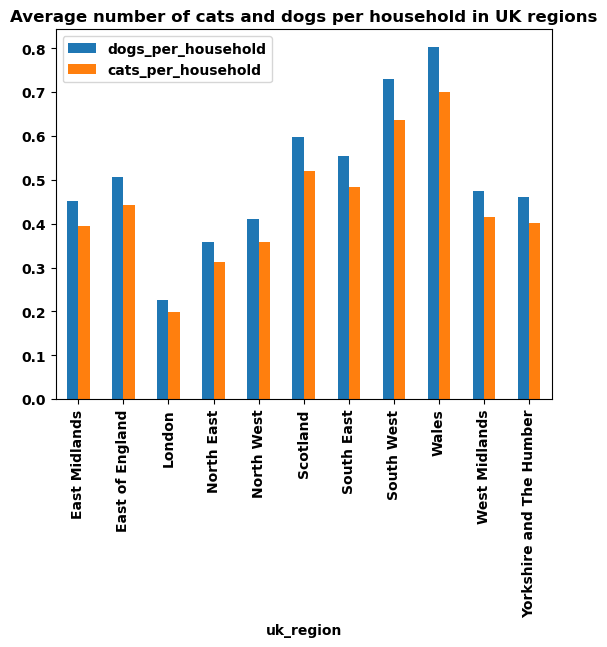

In [156]:
# Create a new datafrme to group the numbers of cats and dogs per household according to uk_region
df_grouped_regions_pets = df_pets.groupby('uk_region')[['dogs_per_household', 'cats_per_household']].mean().reset_index()

# Plot the data
df_grouped_regions_pets.set_index('uk_region').plot(kind = 'bar', stacked= False)
plt.title('Average number of cats and dogs per household in UK regions')

Wales is the region with the largest population of dogs (0.80) and cats (0.70) per household and London is the region with the smallest population of dogs (0.22) and cats (0.20) per household. All of the regions have a higher populations of dogs than cats per household.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'East Midlands'),
  Text(1, 0, 'East of England'),
  Text(2, 0, 'London'),
  Text(3, 0, 'North East'),
  Text(4, 0, 'North West'),
  Text(5, 0, 'Scotland'),
  Text(6, 0, 'South East'),
  Text(7, 0, 'South West'),
  Text(8, 0, 'Wales'),
  Text(9, 0, 'West Midlands'),
  Text(10, 0, 'Yorkshire and The Humber')])

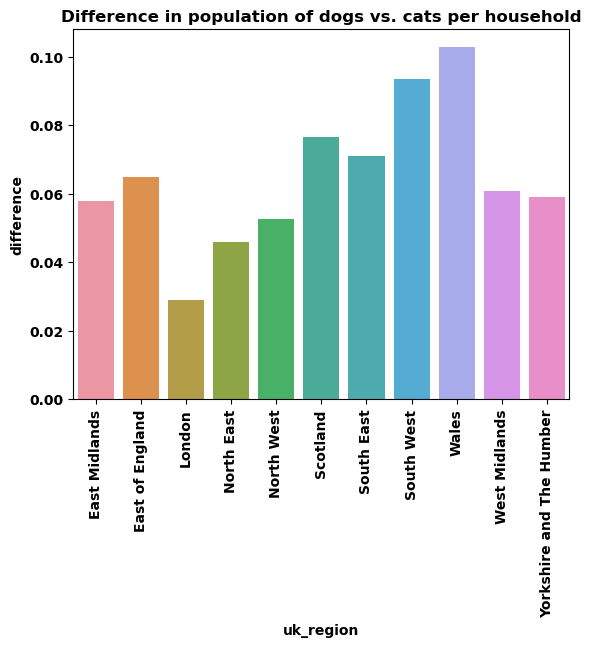

In [157]:
# Plot the difference between dogs and cats per household in different regions of the UK
df_grouped_regions_pets['difference'] = df_grouped_regions_pets['dogs_per_household'] - df_grouped_regions_pets['cats_per_household']
sns.barplot(x = 'uk_region', y = 'difference', data = df_grouped_regions_pets)
plt.title('Difference in population of dogs vs. cats per household')
plt.xticks(rotation = 90)

The average number of dogs per household is higher than the average number of cats per household in all UK regions. The biggest difference is in Wales where there is almost 0.1 more dogs per household. The smallest difference is in London (~0.02).

In [158]:
# Explore the population per uk_region
df_grouped_regions_population = df_pets.groupby('uk_region')['population'].sum().sort_values(ascending=False).reset_index()
df_grouped_regions_population

,uk_region,population
0,South East,8605647.0
1,London,8191934.0
2,North West,7035071.0
3,East of England,5841014.0
4,West Midlands,5627520.0
5,Scotland,5290293.0
6,South West,5283351.0
7,Yorkshire and The Humber,5280534.0
8,East Midlands,4563466.0
9,Wales,3045481.0


A quick check of the population in the UK regions shows that London is second biggest in terms of total population while Wales is second to last. I will further explore the correlation between 'population' and number of dogs and cats per household.

In [159]:
# Find the correlation coefficient and p value for 'population' and number of dogs and cats per household
correlation_coefficient, p_value = stats.pearsonr(df_grouped_regions_population['population'], df_grouped_regions_pets['dogs_per_household'])
print(correlation_coefficient, p_value)

-0.2648786412815353 0.4311957940699196


The p value is very small so there is no significant correlation between 'population' and number of dogs and cats per household in different UK regions. I proceed to check if there is any correlation between 'population' and number of dogs and cats per household in different UK towns.

In [160]:
# Examine the population of different towns
df_grouped_towns_population = df_pets.groupby('town')['population'].sum().reset_index()
df_grouped_towns_population

,town,population
0,"Abbey Hey, Gorton",23432.0
1,"Abbey Village, Adlington, Anderton, Anglezarke...",34641.0
2,"Abbey Wood, West Heath, Crossness, Thamesmead",27329.0
3,"Abbeydale, Nether Edge, Millhouses, Carter Knowle",17457.0
4,"Abbots Ripton, Alconbury, Alconbury Weston, Ba...",47969.0
...,...,...
2606,Yateley,14823.0
2607,"Yeading, Hayes",39573.0
2608,"Yelverton, Bellever, Crapstone, Horrabridge, P...",12084.0
2609,Yeovil,62656.0


In [161]:
# Group the data for 'dogs_per_household', 'cats_per_household' per town
df_grouped_towns_pets = df_pets.groupby('town')[['dogs_per_household', 'cats_per_household']].sum().reset_index()

In [196]:
# Find the correlation coefficient and p value for 'population' and 'dogs_per_household'
correlation_coefficient, p_value = stats.pearsonr(df_grouped_towns_population['population'], df_grouped_towns_pets['dogs_per_household'])
print("The correlation coefficient and p value for 'population' and 'dogs_per_household' are:", round(correlation_coefficient, 2), ' and ', round(p_value, 2))

# Find the correlation coefficient and p value for 'population' and 'cats_per_household'
correlation_coefficient2, p_value2 = stats.pearsonr(df_grouped_towns_population['population'], df_grouped_towns_pets['cats_per_household'])
print("The correlation coefficient and p value for 'population' and 'cats_per_household' are:", round(correlation_coefficient2, 2), ' and ', round(p_value2, 2))

The correlation coefficient and p value for 'population' and 'dogs_per_household' are: -0.12  and  0.0
The correlation coefficient and p value for 'population' and 'cats_per_household' are: -0.12  and  0.0


It seems that there is a weak negative correlation between the population of a town and the 'dogs_per_household' and 'cats_per_household' in the town. I will further illustrate the relationship using plots.

Text(0.5, 1.0, 'Cats per household vs Population')

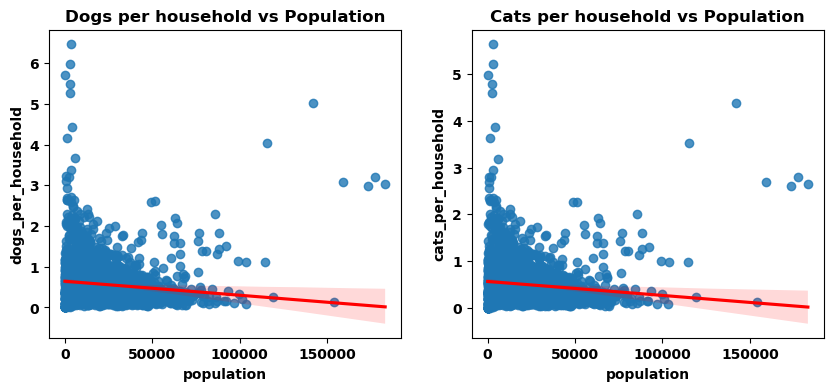

In [192]:
# Plot the correlation between 'population' and 'dogs_per_household' / 'cats_per_household'
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.regplot(x = df_grouped_towns_population['population'], y = df_grouped_towns_pets['dogs_per_household'], line_kws = dict(color = 'r'))
plt.title('Dogs per household vs Population')

plt.subplot(1, 2, 2)
sns.regplot(x = df_grouped_towns_population['population'], y = df_grouped_towns_pets['cats_per_household'], line_kws = dict(color = 'r'))
plt.title('Cats per household vs Population')

The two plots illustrate the weak negative correlation that was previously established. The lighter red shade around the red line shows the confidence interval. There is limited data for towns with population of more than 80000 people and the confidence interval is wider. The graphs are very similar for both dogs and cats per household. Overall, we can conclude that a weak negative correlation is present so towns with smaller populations tend to have more dogs and cats per household compared to towns with larger populations.